# Python notebook "Raices ecuaciones algebraicas"

Tratamiento de Datos Experimentales (530.307) 

Author: Esteban Vöhringer-Martinez

# Determinar la concentración en equilibrio 

En algunos casos el polinomio a resolver es de orden mayor o igual a 3 y no se puede resolver analiticamente.


Ejemplo: $CH_4(g) + 2 H_2O(g) <=> CO_2(g) + H_2(g)$


Tarea: Determine la concentación en equilibrio partiendo de 1 mol de metano y 1 mol de agua

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def f(x):
     return 256*x**5-0.74*(1-x)*(1-2*x)**2

In [62]:
x = np.linspace(1,-1,num=100)

In [63]:
y = f(x)

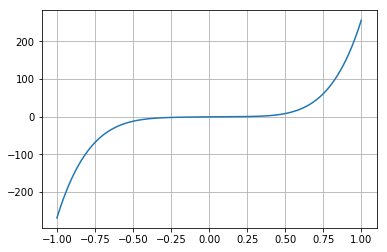

In [64]:
plt.plot(x,y)
plt.grid(True)

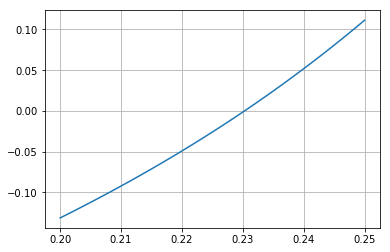

In [156]:
x = np.linspace(0.2,0.25,num=100)
y = f(x)
plt.plot(x,y)
plt.grid(True)

Discutir métodos abiertos y cerrados, sus ventajas y desventajas ...

## Ejemplo de Newton Raphson fijando número de iteraciones

In [70]:
def df(x):
    return 1280*x**4 + 8.88 * x**2 - 11.84 * x + 3.7

In [90]:
def newton_raphson(inicio, iteraciones):
    x = inicio
    for _ in range(iteraciones):
        x = x - (f(x) / df(x))
    return x    

In [92]:
newton_raphson(10,1)

7.999932999360281

In [118]:
for n in range(40):
    print('n = {0:d}: {1:2.10f}'.format(n,newton_raphson(10,n)))

n = 0: 10.0000000000
n = 1: 7.9999329994
n = 2: 6.3998697650
n = 3: 5.1198105638
n = 4: 4.0957572742
n = 5: 3.2765138221
n = 6: 2.6211265409
n = 7: 2.0968361121
n = 8: 1.6774379946
n = 9: 1.3419682350
n = 10: 1.0736475345
n = 11: 0.8590303202
n = 12: 0.6873216064
n = 13: 0.5498540937
n = 14: 0.4397935286
n = 15: 0.3523445777
n = 16: 0.2861116297
n = 17: 0.2451262225
n = 18: 0.2314493842
n = 19: 0.2302821667
n = 20: 0.2302746815
n = 21: 0.2302746812
n = 22: 0.2302746812
n = 23: 0.2302746812
n = 24: 0.2302746812
n = 25: 0.2302746812
n = 26: 0.2302746812
n = 27: 0.2302746812
n = 28: 0.2302746812
n = 29: 0.2302746812
n = 30: 0.2302746812
n = 31: 0.2302746812
n = 32: 0.2302746812
n = 33: 0.2302746812
n = 34: 0.2302746812
n = 35: 0.2302746812
n = 36: 0.2302746812
n = 37: 0.2302746812
n = 38: 0.2302746812
n = 39: 0.2302746812


Newton Raphson con criterio de convergencia

In [114]:
def newton_raphson_conv(inicio, convergencia):
    x = inicio
    error = 1e12
    while error >= convergencia:
        x_new = x - (f(x) / df(x))
        error = abs(1 - x_new / x)  
        x = x_new
    return x    

In [119]:
newton_raphson_conv(10,1e-10)

0.23027468115886976

### Estas herramientas ya estan implementadas en python en el módulo scipy
optimize.newton
etc.

In [121]:
from scipy.optimize import *

In [159]:
newton?

In [146]:
newton(f,10)

0.23027468115886976

In [147]:
newton(f,2,maxiter=15)

RuntimeError: Failed to converge after 15 iterations, value is 0.23228172022864949

¿Porque no se uso la derivada para el cálculo?

In [148]:
newton(f,2,maxiter=15,fprime=df)

0.23027468115886976